Currency Classifier Neural Network Using Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Step 1- Building CNN

In [2]:
classifier=Sequential()

In [3]:
# first convolution layer and then polling layer
classifier.add(Convolution2D(32, (3,3), input_shape=(64,64,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [4]:
#second convolution layer and pooling , input will be from first layer
classifier.add(Convolution2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

In [5]:
#Flattening the layer
classifier.add(Flatten())

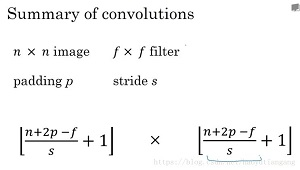

In [6]:
# importing lib for image display
from google.colab.patches import cv2_imshow,cv2
img = cv2.imread("/content/sample_data/Formula.png",cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [7]:
#Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu')) #Dense and fully connected are two names for the same thing
classifier.add(Dense(units=2, activation='softmax')) # softmax for more than 2 classification, we can use sigmoid as well since we have only 2 classes

In [8]:
#Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

step2 prepairing test-train data set

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
training_set=train_datagen.flow_from_directory('/content/sample_data/train/',
                                               target_size=(64,64), batch_size=5, color_mode='grayscale', class_mode='categorical')

Found 44 images belonging to 3 classes.


In [13]:
test_set=test_datagen.flow_from_directory('/content/sample_data/test/',
                                               target_size=(64,64), batch_size=5, color_mode='grayscale', class_mode='categorical')

Found 10 images belonging to 3 classes.


In [14]:
import os
print(os.listdir("/content/sample_data/train/"))

['five-dollar', 'ten-dollar', '.ipynb_checkpoints']


colab creates some hidden folders so keras image generator is giving incorrect number of output classes. it should be equal to the number of folders

In [15]:
os.rmdir("/content/sample_data/train/.ipynb_checkpoints")
os.rmdir("/content/sample_data/test/.ipynb_checkpoints")

In [16]:
training_set=train_datagen.flow_from_directory('/content/sample_data/train/',
                                               target_size=(64,64), batch_size=2, color_mode='grayscale', class_mode='categorical')

Found 44 images belonging to 2 classes.


In [17]:
test_set=test_datagen.flow_from_directory('/content/sample_data/test/',
                                               target_size=(64,64), batch_size=2, color_mode='grayscale', class_mode='categorical')

Found 10 images belonging to 2 classes.


Fitting the classifier with our input dataset

In [18]:
classifier.fit_generator(training_set, steps_per_epoch=20, epochs=200, validation_data=test_set, validation_steps=5)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
20/20 [==============================] - 1s 70ms/step - loss: 0.8605 - accuracy: 0.4750 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/200
20/20 [==============================] - 1s 63ms/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/200
20/20 [==============================] - 1s 71ms/step - loss: 0.6913 - accuracy: 0.6000 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/200
20/20 [==============================] - 1s 70ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6847 - val_accuracy: 0.6000
Epoch 5/200
20/20 [==============================] - 1s 75ms/step - loss: 0.6813 - accuracy: 0.7250 - val_loss: 0.6761 - val_accuracy: 0.8000
Epoch 6/200
20/20 [==============================] - 1s 69ms/step - loss: 0.6772 - accuracy: 0.6750 - val_loss: 0.6823 - val_accuracy: 0.4000
Epoch 7/200
20/20 [==============================] - 1s 73ms/step - loss

In [19]:
model_json=classifier.to_json()
with open('currency-detector.json','w') as json_file:
    json_file.write(model_json)
classifier.save_weights('currency-detector.h5')

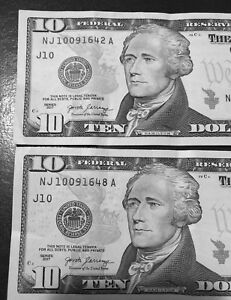

(300, 231)
(64, 64)
[('ten', 1.0), ('five', 0.0)]


In [21]:
from google.colab.patches import cv2_imshow,cv2
verify_10_1 = cv2.imread("/content/verify_10_1.jpg",0)#cv2.COLOR_BGR2GRAY
cv2_imshow(verify_10_1)
print(verify_10_1.shape)
verify_10_1=cv2.resize(verify_10_1,(64,64))
print(verify_10_1.shape)
result=classifier.predict(verify_10_1.reshape(1,64,64,1))

prediction={'five':result[0][0],
                 'ten':result[0][1]
                }
import operator
prediction=sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
print(prediction)


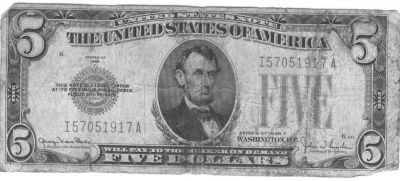

(181, 400)
(64, 64)
[('five', 1.0), ('ten', 0.0)]


In [22]:
from google.colab.patches import cv2_imshow,cv2
# img_predict10 = cv2.imread("/content/verify-10.jpg",0) #cv2.COLOR_BGR2GRAY
img_predict5 = cv2.imread("/content/verify-5.jpg",0)
cv2_imshow(img_predict5)
print(img_predict5.shape)
img_predict5=cv2.resize(img_predict5,(64,64))
print(img_predict5.shape)
result=classifier.predict(img_predict5.reshape(1,64,64,1))

prediction={'five':result[0][0],
                 'ten':result[0][1]
                }
import operator
prediction=sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
print(prediction)

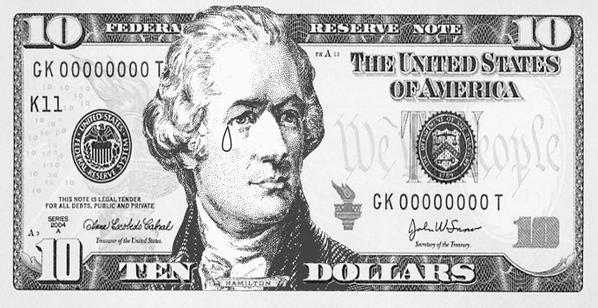

(308, 598)
(64, 64)
[('ten', 1.0), ('five', 0.0)]


In [23]:
from google.colab.patches import cv2_imshow,cv2
# img_predict10 = cv2.imread("/content/verify-10.jpg",0) #cv2.COLOR_BGR2GRAY
verify_10_new = cv2.imread("/content/verify_10_new.jpg",0)
cv2_imshow(verify_10_new)
print(verify_10_new.shape)
verify_10_new=cv2.resize(verify_10_new,(64,64))
print(verify_10_new.shape)
result=classifier.predict(verify_10_new.reshape(1,64,64,1))

prediction={'five':result[0][0],
                 'ten':result[0][1]
                }
import operator
prediction=sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
print(prediction)

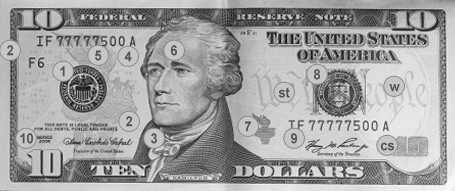

(191, 455)
(64, 64)
[('ten', 1.0), ('five', 0.0)]


In [24]:
from google.colab.patches import cv2_imshow,cv2
img_predict10 = cv2.imread("/content/verify-10.jpg",0) 
# img_predict5 = cv2.imread("/content/verify-5.jpg",cv2.COLOR_BGR2GRAY)
cv2_imshow(img_predict10)
print(img_predict10.shape)
img_predict10=cv2.resize(img_predict10,(64,64))
print(img_predict10.shape)
result=classifier.predict(img_predict10.reshape(1,64,64,1))

prediction={'five':result[0][0],
                 'ten':result[0][1]
                }
import operator
prediction=sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
print(prediction)